# Credit card fraud detection using ML

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models

The dataset is taken from the kaggle.com

_Project Pipeline_

1.Data Understanding
2.Exploratory data analytics
3.Train/Test Split
4.Model-Building
5.Model Evaluation

Lets do it

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Loading the datasets using pandas

In [2]:
credit_card_data=pd.read_csv("D:\creditcard.csv\creditcard.csv")

In [3]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card_data.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#distribution of legit and fradulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This dataset is highly unstable

0-->Normal transaction

1-->fraudulent transaction

In [9]:
#separating the data for analysis
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class==1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


number of fraud transactions-->492

In [11]:
#statistical meausures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
#comparing the values for both the transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#undesampling

build a sample dataset containing similar distribution of normal transactions and fraudulent transactions

no of fraudulent transaction-->492

In [14]:
#random sampling the data
legit_sample = legit.sample(n=492)

In [15]:
print(legit_sample)

            Time        V1        V2        V3        V4        V5        V6  \
95697    65426.0 -0.954593  0.641904  1.441264  0.129655  0.906503 -1.379812   
44613    42017.0 -4.091222  3.076530 -0.834451 -0.484643 -0.921087 -0.219080   
13136    23067.0  1.409622 -1.137389  1.152694 -0.998227 -2.113693 -0.933825   
9143     13000.0 -1.775629  0.147855  2.874313  4.890627  0.566314  0.873777   
141280   84215.0 -0.897810  0.234474  2.652944  2.190584  0.201214  0.022027   
...          ...       ...       ...       ...       ...       ...       ...   
194391  130561.0 -0.769189 -0.609989 -0.453638 -1.454758  0.761712  0.595022   
220046  141998.0 -0.783348  1.704669 -1.281579 -0.533678  0.347106 -0.892101   
28448    35016.0 -0.693292  0.424121  0.998210  0.194692 -1.106451 -0.290015   
78912    57768.0  1.122001 -0.093119 -0.108601 -0.052400 -0.170131 -0.767803   
73554    55186.0  1.256753  0.437502  0.329945  0.682466 -0.269010 -1.045837   

              V7        V8        V9  .

In [16]:
legit_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
95697,65426.0,-0.954593,0.641904,1.441264,0.129655,0.906503,-1.379812,0.963018,-0.149496,-0.723392,...,-0.254260,-1.031327,0.070138,0.311592,0.049182,-0.895839,0.046371,0.120688,20.82,0
44613,42017.0,-4.091222,3.076530,-0.834451,-0.484643,-0.921087,-0.219080,-0.740383,1.631331,0.212776,...,-0.186751,-0.704124,0.138026,-0.794568,0.646761,0.274826,-0.467021,0.182774,12.76,0
13136,23067.0,1.409622,-1.137389,1.152694,-0.998227,-2.113693,-0.933825,-1.410046,-0.154580,-0.125992,...,-0.362424,-0.540066,0.163513,0.579726,0.038410,-0.354381,0.016340,0.031821,43.05,0
9143,13000.0,-1.775629,0.147855,2.874313,4.890627,0.566314,0.873777,-0.135343,-0.077841,0.192946,...,-0.240293,0.453271,0.504867,-0.154706,0.289510,0.492946,0.123951,-0.078302,57.49,0
141280,84215.0,-0.897810,0.234474,2.652944,2.190584,0.201214,0.022027,-0.443459,0.439624,-0.605286,...,0.152887,0.328782,0.088995,0.507067,-0.649698,-0.185320,0.161116,0.180888,0.00,0


In [17]:
legit_sample.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
194391,130561.0,-0.769189,-0.609989,-0.453638,-1.454758,0.761712,0.595022,-0.369805,0.743927,-1.734939,...,0.347839,0.582401,0.341844,-1.422674,-1.307482,-0.359322,0.149347,0.042138,66.50,0
220046,141998.0,-0.783348,1.704669,-1.281579,-0.533678,0.347106,-0.892101,0.292561,0.723971,-0.278594,...,-0.285432,-0.853462,0.186721,0.485622,-0.287518,0.125675,0.085174,0.010444,8.99,0
28448,35016.0,-0.693292,0.424121,0.998210,0.194692,-1.106451,-0.290015,0.479518,0.451500,-0.322999,...,0.290006,0.446080,0.493760,0.396883,-0.519735,0.351783,-0.137522,-0.011321,170.80,0
78912,57768.0,1.122001,-0.093119,-0.108601,-0.052400,-0.170131,-0.767803,0.339581,-0.188534,-0.364186,...,-0.360246,-1.296999,0.079738,0.036917,0.094959,0.615050,-0.118709,0.005312,89.56,0
73554,55186.0,1.256753,0.437502,0.329945,0.682466,-0.269010,-1.045837,0.165372,-0.269506,-0.142378,...,-0.274199,-0.735422,0.115345,0.376994,0.255070,0.090513,-0.015561,0.033338,1.98,0


concatenating two datasets

In [18]:
New_dataset = pd.concat([legit_sample,fraud],axis=0)

In [19]:
New_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
95697,65426.0,-0.954593,0.641904,1.441264,0.129655,0.906503,-1.379812,0.963018,-0.149496,-0.723392,...,-0.254260,-1.031327,0.070138,0.311592,0.049182,-0.895839,0.046371,0.120688,20.82,0
44613,42017.0,-4.091222,3.076530,-0.834451,-0.484643,-0.921087,-0.219080,-0.740383,1.631331,0.212776,...,-0.186751,-0.704124,0.138026,-0.794568,0.646761,0.274826,-0.467021,0.182774,12.76,0
13136,23067.0,1.409622,-1.137389,1.152694,-0.998227,-2.113693,-0.933825,-1.410046,-0.154580,-0.125992,...,-0.362424,-0.540066,0.163513,0.579726,0.038410,-0.354381,0.016340,0.031821,43.05,0
9143,13000.0,-1.775629,0.147855,2.874313,4.890627,0.566314,0.873777,-0.135343,-0.077841,0.192946,...,-0.240293,0.453271,0.504867,-0.154706,0.289510,0.492946,0.123951,-0.078302,57.49,0
141280,84215.0,-0.897810,0.234474,2.652944,2.190584,0.201214,0.022027,-0.443459,0.439624,-0.605286,...,0.152887,0.328782,0.088995,0.507067,-0.649698,-0.185320,0.161116,0.180888,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [20]:
New_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
95697,65426.0,-0.954593,0.641904,1.441264,0.129655,0.906503,-1.379812,0.963018,-0.149496,-0.723392,...,-0.254260,-1.031327,0.070138,0.311592,0.049182,-0.895839,0.046371,0.120688,20.82,0
44613,42017.0,-4.091222,3.076530,-0.834451,-0.484643,-0.921087,-0.219080,-0.740383,1.631331,0.212776,...,-0.186751,-0.704124,0.138026,-0.794568,0.646761,0.274826,-0.467021,0.182774,12.76,0
13136,23067.0,1.409622,-1.137389,1.152694,-0.998227,-2.113693,-0.933825,-1.410046,-0.154580,-0.125992,...,-0.362424,-0.540066,0.163513,0.579726,0.038410,-0.354381,0.016340,0.031821,43.05,0
9143,13000.0,-1.775629,0.147855,2.874313,4.890627,0.566314,0.873777,-0.135343,-0.077841,0.192946,...,-0.240293,0.453271,0.504867,-0.154706,0.289510,0.492946,0.123951,-0.078302,57.49,0
141280,84215.0,-0.897810,0.234474,2.652944,2.190584,0.201214,0.022027,-0.443459,0.439624,-0.605286,...,0.152887,0.328782,0.088995,0.507067,-0.649698,-0.185320,0.161116,0.180888,0.00,0


In [21]:
New_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [23]:
New_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [25]:
New_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93212.091463,0.097216,-0.045136,-0.029214,0.051748,-0.049203,-0.077342,0.049594,0.042150,0.033258,...,0.042300,-0.022697,0.022440,0.028039,0.01055,0.025218,-0.018292,0.011061,0.005144,92.187642
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


mean values are same for the new dataset too hence model is good

here begins the machine learning part

spllitting the datset into features and targets

In [27]:
X = New_dataset.drop(columns = 'Class',axis=1)
Y = New_dataset['Class']

In [28]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
95697,65426.0,-0.954593,0.641904,1.441264,0.129655,0.906503,-1.379812,0.963018,-0.149496,-0.723392,...,-0.008608,-0.254260,-1.031327,0.070138,0.311592,0.049182,-0.895839,0.046371,0.120688,20.82
44613,42017.0,-4.091222,3.076530,-0.834451,-0.484643,-0.921087,-0.219080,-0.740383,1.631331,0.212776,...,0.005004,-0.186751,-0.704124,0.138026,-0.794568,0.646761,0.274826,-0.467021,0.182774,12.76
13136,23067.0,1.409622,-1.137389,1.152694,-0.998227,-2.113693,-0.933825,-1.410046,-0.154580,-0.125992,...,-0.388038,-0.362424,-0.540066,0.163513,0.579726,0.038410,-0.354381,0.016340,0.031821,43.05
9143,13000.0,-1.775629,0.147855,2.874313,4.890627,0.566314,0.873777,-0.135343,-0.077841,0.192946,...,0.015732,-0.240293,0.453271,0.504867,-0.154706,0.289510,0.492946,0.123951,-0.078302,57.49
141280,84215.0,-0.897810,0.234474,2.652944,2.190584,0.201214,0.022027,-0.443459,0.439624,-0.605286,...,0.020775,0.152887,0.328782,0.088995,0.507067,-0.649698,-0.185320,0.161116,0.180888,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [29]:
Y

95697     0
44613     0
13136     0
9143      0
141280    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

split the data into training data and testing data

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [31]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


model training

In [33]:
model=LogisticRegression()

In [35]:
#training the logisticregression model with training data
model.fit(X_train,Y_train)

LogisticRegression()

model Evaluation based on accuracy score


In [37]:
#accuracy on training function
X_train_prediction = model.predict(X_train)
train_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [41]:
print('accuracy on training data is:', train_data_accuracy)

accuracy on training data is: 0.9301143583227446


In [42]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [43]:
print('accuracy on test data is :',test_data_accuracy)

accuracy on test data is : 0.9137055837563451


our accuracy on train data and test data not differs too means the prediction of model is good

In [47]:
import seaborn as sns

In [48]:
import warnings
import os

%matplotlib inline

sns.set()
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

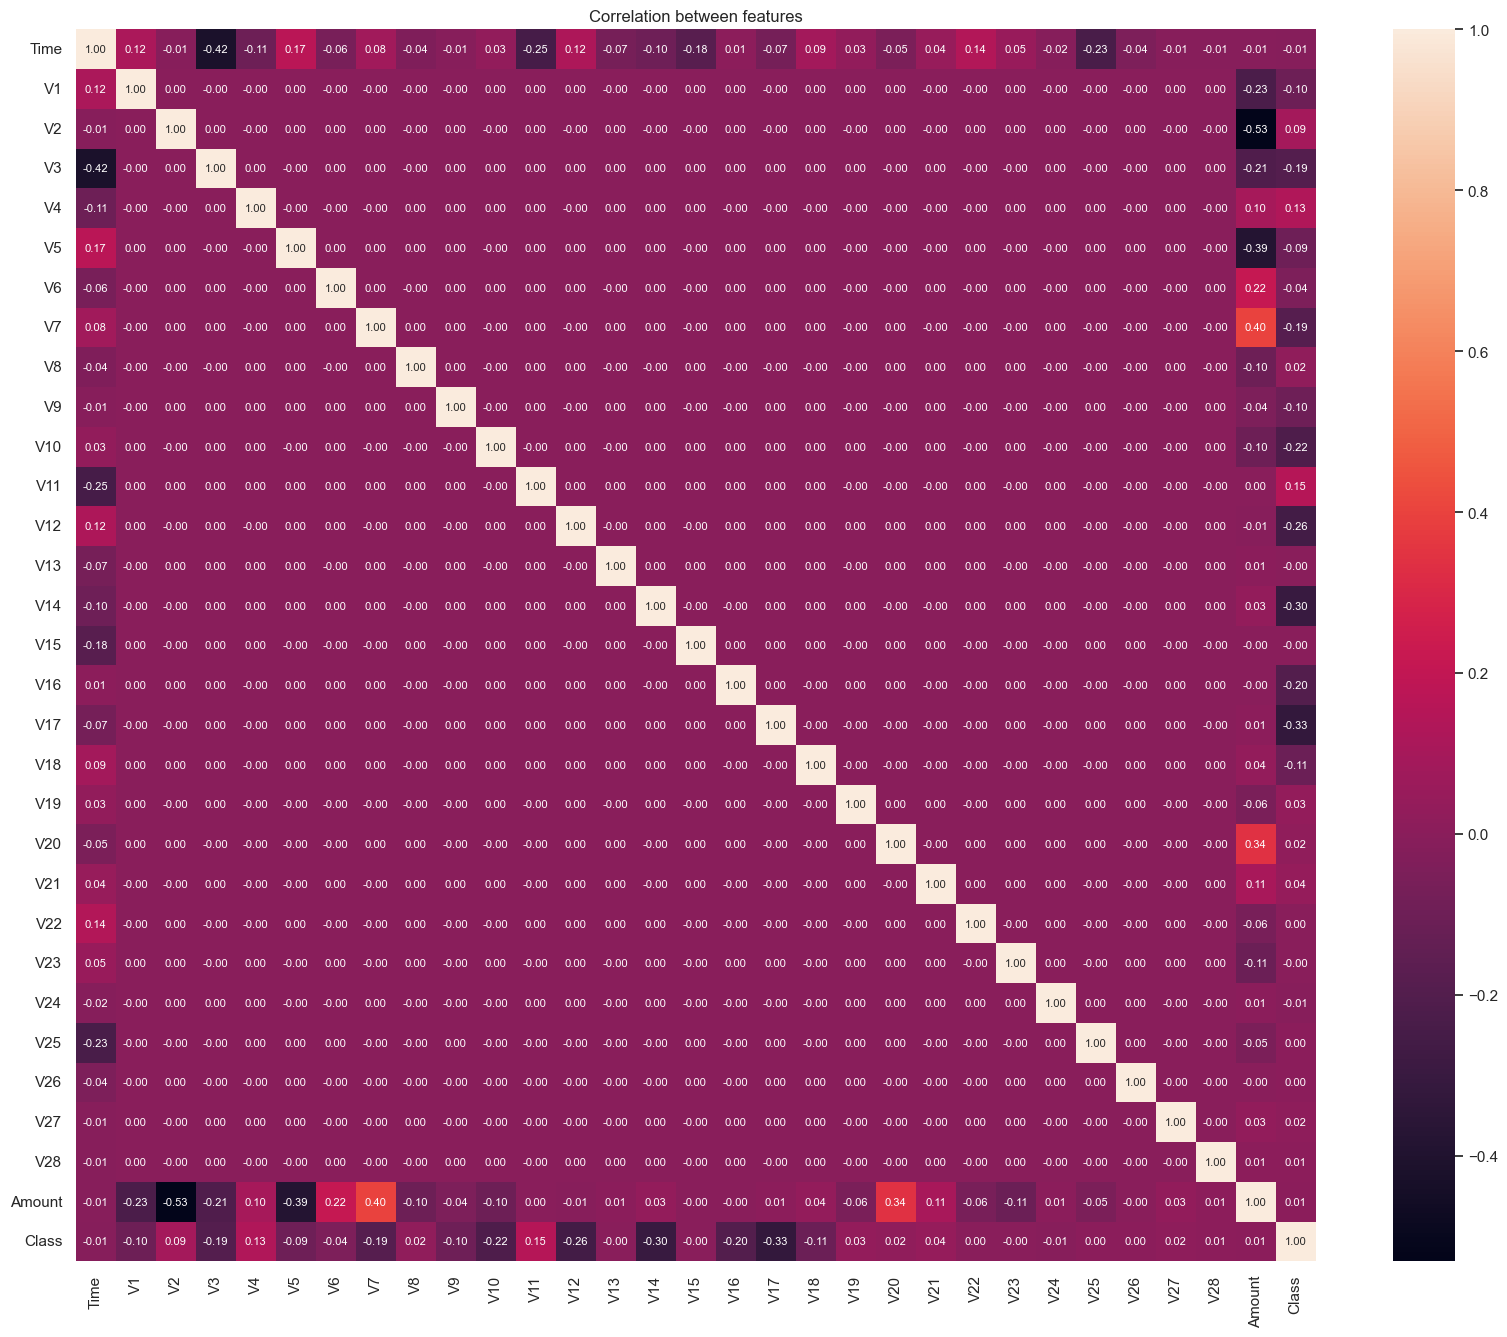

In [51]:
#dealing with class imbalance
corr = credit_card_data.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"fontsize": 8})
plt.title('Correlation between features')
plt.show()

thank u!